In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/enem_2022_v2.csv', low_memory=False, encoding="ISO-8859-1")

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  IN_TREINEIRO            int64  
 11  NO_MUNICIPIO_ESC        object 
 12  SG_UF_ESC               object 
 13  TP_DEPENDENCIA_ADM_ESC  float64
 14  TP_LOCALIZACAO_ESC      float64
 15  TP_PRESENCA_CN          int64  
 16  TP_PRESENCA_CH          int64  
 17  TP_PRESENCA_LC          int64  
 18  TP_PRESENCA_MT          int64  
 19  NU_NOTA_CN              float64
 20  NU_NOTA_CH              float64
 21  NU_NOTA_LC              float64

# Questão 025 - "Na sua residência tem acesso à Internet?"
    A	Não.
    B	Sim.


In [18]:
df['Q025'] = df['Q025'].apply(lambda x: 'A. Não' if x == 'A' else 'B. Sim')

df_count = df['Q025'].value_counts()

df_count


B. Sim    3149732
A. Não     326373
Name: Q025, dtype: int64

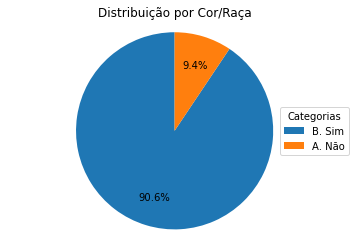

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(df_count, autopct='%.1f%%', startangle=90, pctdistance=0.7)
ax.axis('equal')

plt.title('Distribuição por Cor/Raça')

ax.legend(df_count.index, title='Categorias', loc='center left', bbox_to_anchor=(0.8, 0.5))

plt.show()

In [23]:
df_Q25 = df[['Q025', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].groupby('Q025').mean()

df_Q25['MEDIA_NOTAS'] = df_Q25[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

df_Q25

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_NOTAS
Q025,,,,,,
A. Não,462.074232,484.176939,470.192708,478.427493,523.160928,483.606460
B. Sim,498.894619,530.765422,521.649582,548.113010,626.974636,545.279454


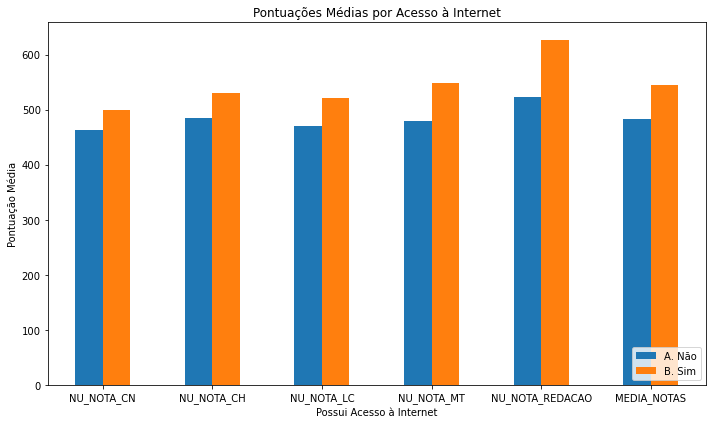

In [28]:
import matplotlib.pyplot as plt

transposed_df_Q25 = df_Q25.transpose()

ax = transposed_df_Q25.plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Possui Acesso à Internet')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Acesso à Internet')

ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()